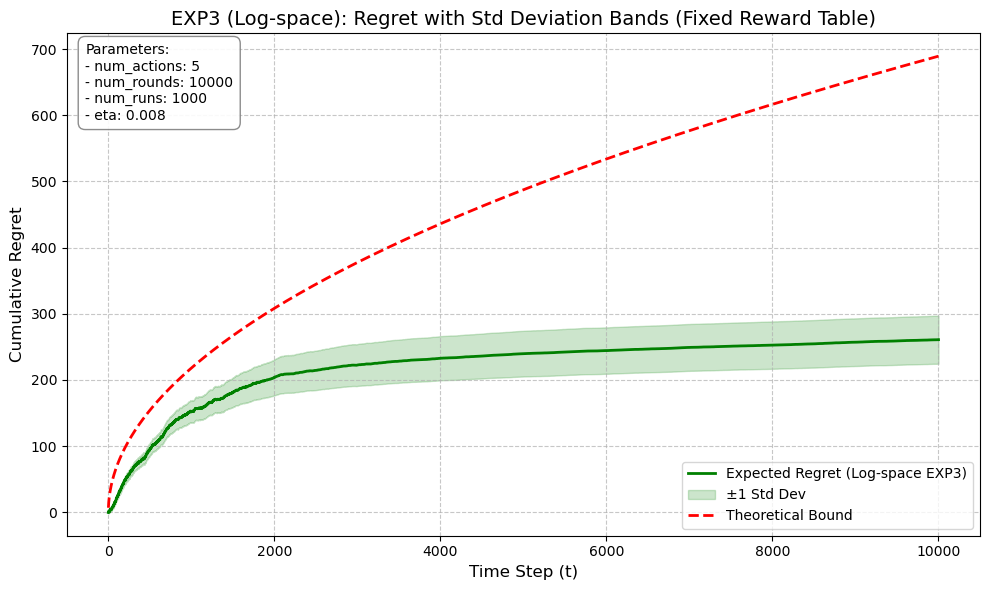

Reward Table Preview (first 5 rounds):
[[0 0 1 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [154]:
import numpy as np
import matplotlib.pyplot as plt

# EXP3 (log-space) Generator
def exp3_logspace(num_actions: int, reward_func, eta: float, reward_min: float = 0.0, reward_max: float = 1.0):
    S = np.zeros(num_actions, dtype=float)
    t = 0
    while True:
        logits = eta * S
        max_logit = np.max(logits)
        exp_logits = np.exp(logits - max_logit)
        prob_dist = exp_logits / np.sum(exp_logits)

        choice = np.random.choice(num_actions, p=prob_dist)
        reward = reward_func(choice, t)
        scaled_reward = (reward - reward_min) / (reward_max - reward_min)

        for i in range(num_actions):
            if i == choice:
                S[i] += 1 - ((1 - scaled_reward) / prob_dist[i])
            else:
                S[i] += 1

        yield choice, reward, S.copy(), prob_dist.copy()
        t += 1

# Modified simulation that takes fixed reward_table
def run_logspace_simulation_fixed_table(reward_vector: np.ndarray, eta: float):
    num_rounds, num_actions = reward_vector.shape
    reward_func = lambda choice, t: reward_vector[t, choice]

    best_action = np.argmax(np.sum(reward_vector, axis=0))
    regrets = np.zeros(num_rounds, dtype=float)
    cumulative_reward = 0.0
    best_action_cumulative_reward = 0.0

    for t, (choice, reward, _, _) in enumerate(exp3_logspace(num_actions, reward_func, eta)):
        cumulative_reward += reward
        best_action_cumulative_reward += reward_vector[t, best_action]
        regrets[t] = best_action_cumulative_reward - cumulative_reward
        if t >= num_rounds - 1:
            break

    return regrets

# Parameters
num_actions = 5
num_rounds = 10000
num_runs = 1000
eta = np.sqrt(2 * np.log(num_actions) / (num_actions * num_rounds))

# FIXED reward table sampled ONCE and reused
biases = 1.0 / np.arange(2, num_actions + 2)
reward_table_fixed = (np.random.random((num_rounds, num_actions)) < biases).astype(int)

# Run simulations using fixed reward table
all_regrets_log = []
for _ in range(num_runs):
    regrets = run_logspace_simulation_fixed_table(reward_table_fixed, eta)
    all_regrets_log.append(regrets)

# Convert to NumPy array
all_regrets_log = np.array(all_regrets_log)
expected_regret_log = np.mean(all_regrets_log, axis=0)
std_dev_regret = np.std(all_regrets_log, axis=0)

# Time steps and bound
t_values = np.arange(1, num_rounds + 1)
theoretical_bound = (np.e - 1) * np.sqrt(2 * num_actions * t_values * np.log(num_actions))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_values, expected_regret_log, label='Expected Regret (Log-space EXP3)', color='green', linewidth=2)
plt.fill_between(t_values,
                 expected_regret_log - std_dev_regret,
                 expected_regret_log + std_dev_regret,
                 color='green', alpha=0.2, label='±1 Std Dev')
plt.plot(t_values, theoretical_bound, label='Theoretical Bound', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time Step (t)', fontsize=12)
plt.ylabel('Cumulative Regret', fontsize=12)
plt.title('EXP3 (Log-space): Regret with Std Deviation Bands (Fixed Reward Table)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

params = f'Parameters:\n- num_actions: {num_actions}\n- num_rounds: {num_rounds}\n- num_runs: {num_runs}\n- eta: {eta:.3f}'
plt.text(0.02, 0.98, params, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.9))

plt.show()

# Optional: view the first few rows of reward table
print("Reward Table Preview (first 5 rounds):")
print(reward_table_fixed[:5])


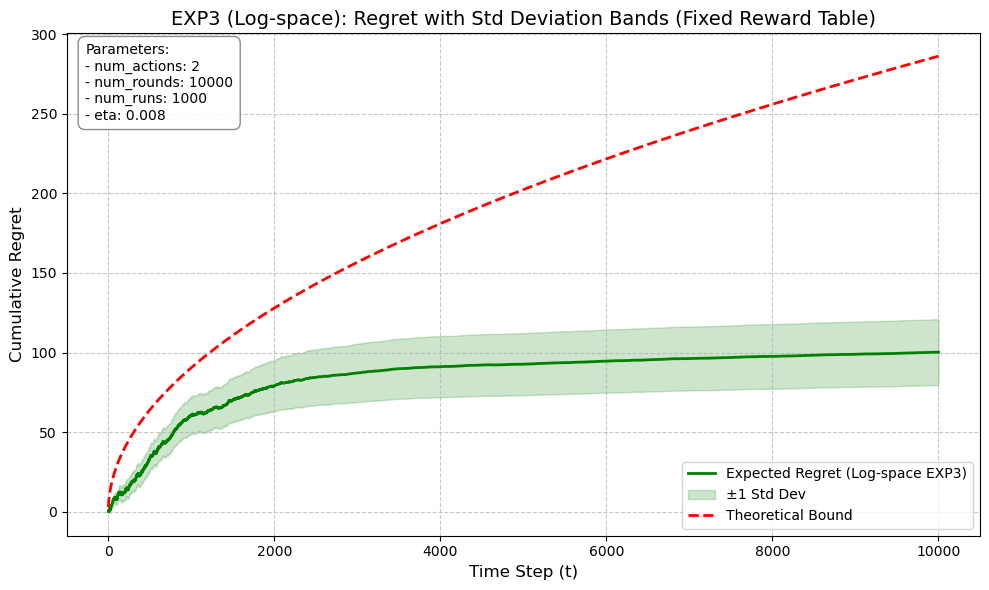

Reward Table Preview (first 5 rounds):
[[1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]]


In [155]:
import numpy as np
import matplotlib.pyplot as plt

# EXP3 (log-space) Generator
def exp3_logspace(num_actions: int, reward_func, eta: float, reward_min: float = 0.0, reward_max: float = 1.0):
    S = np.zeros(num_actions, dtype=float)
    t = 0
    while True:
        logits = eta * S
        max_logit = np.max(logits)
        exp_logits = np.exp(logits - max_logit)
        prob_dist = exp_logits / np.sum(exp_logits)

        choice = np.random.choice(num_actions, p=prob_dist)
        reward = reward_func(choice, t)
        scaled_reward = (reward - reward_min) / (reward_max - reward_min)

        for i in range(num_actions):
            if i == choice:
                S[i] += 1 - ((1 - scaled_reward) / prob_dist[i])
            else:
                S[i] += 1

        yield choice, reward, S.copy(), prob_dist.copy()
        t += 1

# Modified simulation that takes fixed reward_table
def run_logspace_simulation_fixed_table(reward_vector: np.ndarray, eta: float):
    num_rounds, num_actions = reward_vector.shape
    reward_func = lambda choice, t: reward_vector[t, choice]

    best_action = np.argmax(np.sum(reward_vector, axis=0))
    regrets = np.zeros(num_rounds, dtype=float)
    cumulative_reward = 0.0
    best_action_cumulative_reward = 0.0

    for t, (choice, reward, _, _) in enumerate(exp3_logspace(num_actions, reward_func, eta)):
        cumulative_reward += reward
        best_action_cumulative_reward += reward_vector[t, best_action]
        regrets[t] = best_action_cumulative_reward - cumulative_reward
        if t >= num_rounds - 1:
            break

    return regrets

# Parameters
num_actions = 2
num_rounds = 10000
num_runs = 1000
eta = np.sqrt(2 * np.log(num_actions) / (num_actions * num_rounds))

# FIXED reward table sampled ONCE and reused
biases = 1.0 / np.arange(2, num_actions + 2)
reward_table_fixed = (np.random.random((num_rounds, num_actions)) < biases).astype(int)

# Run simulations using fixed reward table
all_regrets_log = []
for _ in range(num_runs):
    regrets = run_logspace_simulation_fixed_table(reward_table_fixed, eta)
    all_regrets_log.append(regrets)

# Convert to NumPy array
all_regrets_log = np.array(all_regrets_log)
expected_regret_log = np.mean(all_regrets_log, axis=0)
std_dev_regret = np.std(all_regrets_log, axis=0)

# Time steps and bound
t_values = np.arange(1, num_rounds + 1)
theoretical_bound = (np.e - 1) * np.sqrt(2 * num_actions * t_values * np.log(num_actions))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_values, expected_regret_log, label='Expected Regret (Log-space EXP3)', color='green', linewidth=2)
plt.fill_between(t_values,
                 expected_regret_log - std_dev_regret,
                 expected_regret_log + std_dev_regret,
                 color='green', alpha=0.2, label='±1 Std Dev')
plt.plot(t_values, theoretical_bound, label='Theoretical Bound', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time Step (t)', fontsize=12)
plt.ylabel('Cumulative Regret', fontsize=12)
plt.title('EXP3 (Log-space): Regret with Std Deviation Bands (Fixed Reward Table)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

params = f'Parameters:\n- num_actions: {num_actions}\n- num_rounds: {num_rounds}\n- num_runs: {num_runs}\n- eta: {eta:.3f}'
plt.text(0.02, 0.98, params, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.9))

plt.show()

# Optional: view the first few rows of reward table
print("Reward Table Preview (first 5 rounds):")
print(reward_table_fixed[:5])


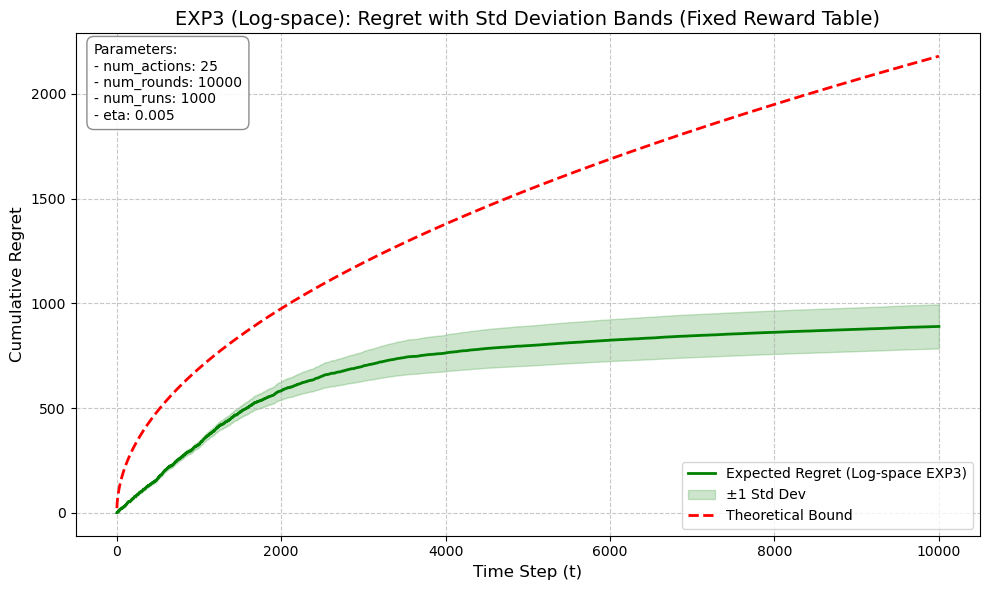

Reward Table Preview (first 5 rounds):
[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [156]:
import numpy as np
import matplotlib.pyplot as plt

# EXP3 (log-space) Generator
def exp3_logspace(num_actions: int, reward_func, eta: float, reward_min: float = 0.0, reward_max: float = 1.0):
    S = np.zeros(num_actions, dtype=float)
    t = 0
    while True:
        logits = eta * S
        max_logit = np.max(logits)
        exp_logits = np.exp(logits - max_logit)
        prob_dist = exp_logits / np.sum(exp_logits)

        choice = np.random.choice(num_actions, p=prob_dist)
        reward = reward_func(choice, t)
        scaled_reward = (reward - reward_min) / (reward_max - reward_min)

        for i in range(num_actions):
            if i == choice:
                S[i] += 1 - ((1 - scaled_reward) / prob_dist[i])
            else:
                S[i] += 1

        yield choice, reward, S.copy(), prob_dist.copy()
        t += 1

# Modified simulation that takes fixed reward_table
def run_logspace_simulation_fixed_table(reward_vector: np.ndarray, eta: float):
    num_rounds, num_actions = reward_vector.shape
    reward_func = lambda choice, t: reward_vector[t, choice]

    best_action = np.argmax(np.sum(reward_vector, axis=0))
    regrets = np.zeros(num_rounds, dtype=float)
    cumulative_reward = 0.0
    best_action_cumulative_reward = 0.0

    for t, (choice, reward, _, _) in enumerate(exp3_logspace(num_actions, reward_func, eta)):
        cumulative_reward += reward
        best_action_cumulative_reward += reward_vector[t, best_action]
        regrets[t] = best_action_cumulative_reward - cumulative_reward
        if t >= num_rounds - 1:
            break

    return regrets

# Parameters
num_actions = 25
num_rounds = 10000
num_runs = 1000
eta = np.sqrt(2 * np.log(num_actions) / (num_actions * num_rounds))

# FIXED reward table sampled ONCE and reused
biases = 1.0 / np.arange(2, num_actions + 2)
reward_table_fixed = (np.random.random((num_rounds, num_actions)) < biases).astype(int)

# Run simulations using fixed reward table
all_regrets_log = []
for _ in range(num_runs):
    regrets = run_logspace_simulation_fixed_table(reward_table_fixed, eta)
    all_regrets_log.append(regrets)

# Convert to NumPy array
all_regrets_log = np.array(all_regrets_log)
expected_regret_log = np.mean(all_regrets_log, axis=0)
std_dev_regret = np.std(all_regrets_log, axis=0)

# Time steps and bound
t_values = np.arange(1, num_rounds + 1)
theoretical_bound = (np.e - 1) * np.sqrt(2 * num_actions * t_values * np.log(num_actions))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_values, expected_regret_log, label='Expected Regret (Log-space EXP3)', color='green', linewidth=2)
plt.fill_between(t_values,
                 expected_regret_log - std_dev_regret,
                 expected_regret_log + std_dev_regret,
                 color='green', alpha=0.2, label='±1 Std Dev')
plt.plot(t_values, theoretical_bound, label='Theoretical Bound', color='red', linestyle='--', linewidth=2)
plt.xlabel('Time Step (t)', fontsize=12)
plt.ylabel('Cumulative Regret', fontsize=12)
plt.title('EXP3 (Log-space): Regret with Std Deviation Bands (Fixed Reward Table)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

params = f'Parameters:\n- num_actions: {num_actions}\n- num_rounds: {num_rounds}\n- num_runs: {num_runs}\n- eta: {eta:.3f}'
plt.text(0.02, 0.98, params, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.9))

plt.show()

# Optional: view the first few rows of reward table
print("Reward Table Preview (first 5 rounds):")
print(reward_table_fixed[:5])
